# Action 1

In [1]:
import numpy as np

In [2]:
from scipy.linalg import svd
from PIL import Image
import matplotlib.pyplot as plt

##### 以下方法取前k个特征，对图像进行还原

In [3]:
def get_image_feature(s, k):
	# 对于S，只保留前K个特征值
	s_temp = np.zeros(s.shape[0])
	s_temp[0:k] = s[0:k]
	s = s_temp * np.identity(s.shape[0])
	# 用新的s_temp，以及p,q重构A
	temp = np.dot(p,s)
	temp = np.dot(temp,q)
	plt.imshow(temp, cmap=plt.cm.gray, interpolation='nearest')
	plt.show()
	print(A-temp)

##### 加载一张网上下载的彩色图片

In [4]:
image = Image.open('./picture.bmp') 

##### 对图像进行灰度化处理，使用PIL自带的灰度处理方法 （不进行灰色处理会报expected matrix的错）

In [5]:
im_gray = image.convert('L')

##### 将灰度化后的图片转化为图像矩阵

In [6]:
A = np.array(im_gray)

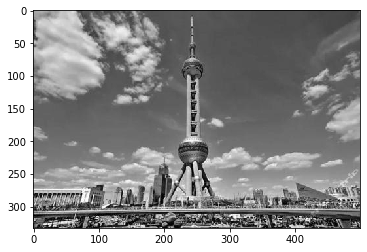

In [7]:
# 显示原图像
plt.imshow(A, cmap=plt.cm.gray, interpolation='nearest')

In [8]:
plt.show()

##### 对图像矩阵A进行奇异值分解，得到p,s,q

In [9]:
p,s,q = svd(A, full_matrices=False)

##### 计算原图片像素总共的元素，主要是为了计算1%，10%还有50%的奇异值数分别对应多少特征因子k

In [13]:
total = 350* 500

##### 计算1%对应的k值

In [17]:
num_1 = total * 0.01

In [18]:
num1 = num_1 / (350 + 1 + 500)
num1

2.056404230317274

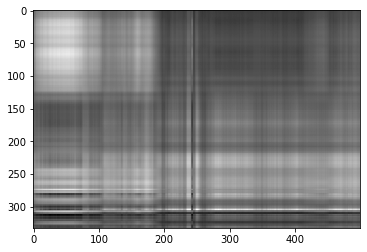

[[  68.47386428   67.6097099    64.87186354 ...  -12.78426058
   -12.08215674  -11.96562832]
 [  61.50442205   60.64039445   58.9030387  ...  -15.75803465
   -10.05586701   -4.93950985]
 [  55.52036741   55.65515375   52.915061   ...  -13.71924265
    -3.01725332    6.1005508 ]
 ...
 [ -77.90476036  -21.7353232    -5.54728581 ... -106.55897443
   -43.49850892   14.11757017]
 [ -53.30721999  -10.98321447   -0.42819897 ... -109.03698968
   -88.95096347 -103.52431553]
 [ -47.04041486  -32.00816368  -22.12430563 ...  -78.17037061
   -51.1277282   -80.34532396]]


In [20]:
# 取前k个特征，对图像进行还原
get_image_feature(s, 2)

##### 计算10%对应的k值

In [21]:
num_10 = total * 0.1
num10 = num_10 / (350 + 1 + 500)
num10

20.564042303172737

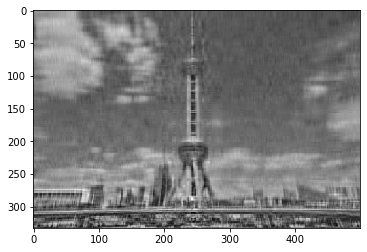

[[ 23.92408244  12.96175157   8.89161513 ...   4.4251426   -4.39358371
   -4.95246723]
 [ 19.29961603  10.03557766   8.04282877 ...   1.83788303  -1.95212155
    3.08289881]
 [ 12.87977773   7.47721771   6.74511263 ...   3.59455928   5.10170865
   15.26279902]
 ...
 [-23.72983533 -23.49286096 -47.70333334 ...   8.46180572  28.24396684
   54.57704249]
 [  5.84547373  10.0758831    9.93215747 ... -18.8539093  -14.41412853
  -47.65234038]
 [  0.76535606 -13.23959917   0.72365818 ... -33.14403148 -15.81933099
  -48.44685292]]


In [22]:
get_image_feature(s, 20)

##### 可以看到，10%的特征值就能展现原图90%的内容

##### 计算50%对应的k值

In [23]:
num_50 = total * 0.5
num50 = num_50 / (350 + 1 + 500)
num50

102.82021151586369

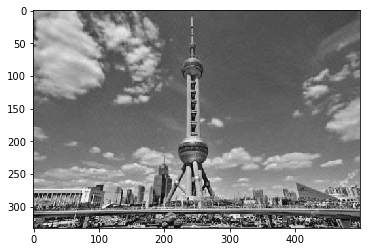

[[ 2.09260398  0.79578859 -1.55128609 ...  5.18766344 -2.18467283
  -4.37732136]
 [ 1.47292816 -0.46453039 -1.81286704 ...  0.35273714 -2.11021782
   0.328202  ]
 [ 0.61524785  0.33288119 -1.2555242  ... -2.98922567  0.80286984
   5.961216  ]
 ...
 [ 1.95921176  2.5175403   1.63204759 ... -1.93795465  0.7770834
   2.70925009]
 [-0.89542144 -0.83717222 -0.5563896  ...  1.76732229  0.98560248
  -0.28705731]
 [-1.10480776  0.75892901  0.92926324 ... -1.6816276   0.33331679
  -0.02905126]]


In [24]:
get_image_feature(s, 100)